# 第5部　統計的推定

## 4章　母分散の推定

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# グラフの日本語表記
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Meiryo'

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 実装：母集団の用意

In [3]:
# 平均4、標準偏差0.8の正規分布を使いまわす
population = stats.norm(loc=4, scale=0.8)

### 実装：標本分散と不偏分散を計算する

In [4]:
np.random.seed(2)
sample = population.rvs(size=10)
sample

array([3.66659372, 3.95498654, 2.29104312, 5.31221665,
       2.56525153, 3.32660211, 4.40230513, 3.00376953,
       3.15363822, 3.27279391])

In [5]:
print('標本分散', round(np.var(sample, ddof=0), 3))
print('不偏分散', round(np.var(sample, ddof=1), 3))

標本分散 0.712
不偏分散 0.791


### 実装：標本分散の平均値

In [6]:
# 「標本分散」を格納する入れ物
sample_var_array = np.zeros(10000)

In [7]:
# 「データを10個選んで標本分散を求める」試行を10000回繰り返す
np.random.seed(1)
for i in range(0, 10000):
    sample_loop = population.rvs(size=10)
    sample_var_array[i] = np.var(sample_loop, ddof=0)

In [8]:
# 標本分散の平均値
round(np.mean(sample_var_array), 3)

0.575

### 実装：不偏分散の平均値

In [9]:
# 「不偏分散」を格納する入れ物
unbias_var_array = np.zeros(10000)
# 「データを10個選んで不偏分散を求める」試行を10000回繰り返す
np.random.seed(1)
for i in range(0, 10000):
    sample_loop = population.rvs(size=10)
    unbias_var_array[i] = np.var(sample_loop, ddof=1)
# 不偏分散の平均値
round(np.mean(unbias_var_array), 3)

0.639

### 実装：サンプルサイズを大きくしたときの不偏分散

In [10]:
# サンプルサイズを10～100010までの範囲で100区切りで変化させる
size_array =  np.arange(start=10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [11]:
# 「不偏分散」を格納する入れ物
unbias_var_array_size = np.zeros(len(size_array))

In [12]:
# 「不偏分散を求める」試行を、サンプルサイズを変えながら何度も実行
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_loop = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample_loop, ddof=1)

In [13]:
# データフレームにまとめる
size_var_df = pd.DataFrame({
    'sample_size': size_array,
    'unbias_var': unbias_var_array_size
})

print(size_var_df.head(3))

   sample_size  unbias_var
0           10    1.008526
1          110    0.460805
2          210    0.631723


<AxesSubplot:xlabel='sample_size', ylabel='unbias_var'>

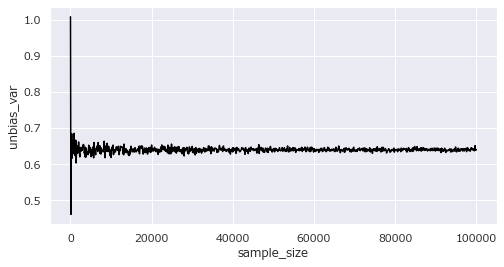

In [14]:
sns.lineplot(x='sample_size', y='unbias_var',
             data=size_var_df, color='black')